# Cotton_leaf Disease project Presentation

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Tensorflow keras CNN Model
import tensorflow as tf
from keras import Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import load_img
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saurabh2392","key":"af95afe12f83652d875ab65b78094a7f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!chmod 744 kaggle.json

In [ ]:
!mv kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d raaavan/cottonleafinfection

 99% 190M/192M [00:11<00:00, 18.9MB/s]
100% 192M/192M [00:11<00:00, 17.8MB/s]


In [ ]:
!unzip cottonleafinfection -d /content

Archive:  cottonleafinfection.zip
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/2015-angular-leaf-spot-colquitt-county-2.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact102.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact106.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact107.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact109.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact11.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact110.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact111.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact112.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact113.jpg  
  inflating: /content/cotton_infection_dir_ready/test/bacterial_blight/bact114.jpg  

In [ ]:
cd /content/cotton_infection_dir_ready/train/bacterial_blight/

/content/cotton_infection_dir_ready/train/bacterial_blight


In [ ]:
import os
train_fnames = os.listdir('/content/cotton_infection_dir_ready/train/bacterial_blight/')

In [ ]:
!pwd

/content/cotton_infection_dir_ready/train/bacterial_blight


In [ ]:
#import matplotlib.image as mpimg
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(5,5))
#nrows = 5
#ncols = 5
#for i in range(25):
 # fig.add_subplot(nrows,ncols,i+1)
  #img = mpimg.imread(train_fnames[i+1])
  #plt.imshow(img)
  #plt.axis(False)
#plt.show()

(-0.5, 335.5, 599.5, -0.5)

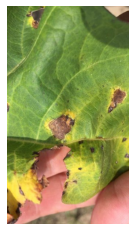

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=mpimg.imread(train_fnames[20])
plt.imshow(img)
plt.axis(False)

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights="imagenet",include_top = False, input_shape=(224,224,1)                                                                                                     ))

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in InceptionV3_model.layers[:-10]:
  layer.trainable = False

In [ ]:
x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(units=128, activation="relu")(x)
x = Dropout(0.2)(x)
output = Dense(units=4, activation="softmax")(x)
model = Model(InceptionV3_model.input, output)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Image augmentation


In [ ]:
#use the img data generator to import images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)
#no flip and zoom for test datase


In [ ]:
#Make sure u provide te same target size initialized for the image size
training_set  = train_datagen.flow_from_directory("/content/cotton_infection_dir_ready/train",
                                                  target_size= (224,224),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 1442 images belonging to 4 classes.


In [ ]:
test_Set =  test_datagen.flow_from_directory("/content/cotton_infection_dir_ready/test",
                                             target_size= (224,224),
                                            batch_size=32,
                                            class_mode="categorical")


Found 343 images belonging to 4 classes.


In [ ]:
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

# Training Model

In [ ]:
#fit the model
#Run the cell. It will take some time to execute
checkpointer = ModelCheckpoint('cotton_leaf.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 5)
history = model.fit(
    training_set,
    validation_data = test_Set,
    epochs=10,
    verbose = 1,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_Set),
    callbacks = [checkpointer, early_stopping]
)

Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 0.9195 - accuracy: 0.6276
Epoch 1: val_loss improved from inf to 0.26038, saving model to cotton_leaf.hdf5
46/46 [==============================] - 40s 582ms/step - loss: 0.9195 - accuracy: 0.6276 - val_loss: 0.2604 - val_accuracy: 0.9067
Epoch 2/10
46/46 [==============================] - ETA: 0s - loss: 0.2885 - accuracy: 0.8981
Epoch 2: val_loss improved from 0.26038 to 0.10850, saving model to cotton_leaf.hdf5
46/46 [==============================] - 24s 510ms/step - loss: 0.2885 - accuracy: 0.8981 - val_loss: 0.1085 - val_accuracy: 0.9475
Epoch 3/10
46/46 [==============================] - ETA: 0s - loss: 0.1682 - accuracy: 0.9466
Epoch 3: val_loss improved from 0.10850 to 0.07664, saving model to cotton_leaf.hdf5
46/46 [==============================] - 23s 505ms/step - loss: 0.1682 - accuracy: 0.9466 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 4/10
46/46 [==============================] - ETA: 0s - loss: 0.1

In [ ]:
os.chdir('/content/')

# saving model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive')

In [ ]:
from keras.models import load_model
model.save('/content/gdrive/MyDrive/Images/cotton_leaf.hdf5')

In [ ]:







----------------------------------------------------------------------------THE END-----------------------------------------------------------------------------------------------------------------









Making Predictions


In [ ]:
from tensorflow.keras.models import load_model
path = F'/content/gdrive/MyDrive/Images/modelcanc.h5'
model=load_model(path)
model


In [ ]:
#use the img data generator to import images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Make sure u provide te same target size initialized for the image size
training_set  = train_datagen.flow_from_directory("/content/Data/train",
                                                  target_size= (224,224),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 613 images belonging to 4 classes.


In [ ]:
test_Set =  test_datagen.flow_from_directory("/content/Data/test",
                                             target_size= (224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 315 images belonging to 4 classes.


In [ ]:
y_pred = model.predict(test_Set)

10/10 [==============================] - 3s 189ms/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 0, 2, 0, 0, 0, 0, 3,
       0, 3, 3, 1, 2, 0, 1, 3, 0, 0, 3, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 3, 0, 3, 2, 3, 0, 1, 0, 3, 3, 0, 3, 0, 3, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0, 3, 3, 0, 0, 0, 3, 2,
       3, 0, 0, 3, 3, 0, 3, 3, 0, 2, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 2, 0,
       3, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 3, 3, 0, 0,
       3, 0, 3, 3, 2, 3, 0, 1, 2, 3, 3, 0, 2, 0, 0, 0, 0, 2, 3, 0, 3, 2,
       2, 3, 2, 0, 3, 0, 3, 0, 2, 2, 2, 3, 0, 0, 2, 3, 3, 0, 3, 0, 0, 0,
       2, 2, 2, 2, 0, 3, 2, 0, 3, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 2, 3, 0, 3, 0, 3, 0,
       0, 2, 0, 0, 3, 0, 0, 3, 3, 0, 2, 2, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 2, 2, 1, 3, 3, 3, 1, 3, 0, 0, 0, 2, 2, 0, 0, 3, 1,
       0, 0, 3, 0, 3, 0, 2, 3, 3, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 3, 0, 0,
       3, 0, 3, 0, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 0,

In [ ]:
! ls /content/Data/test/

adenocarcinoma	large.cell.carcinoma  normal  squamous.cell.carcinoma


In [ ]:
classes = ["Adenocarcinoma","Large cell carcinoma" ,"Normal"," Squamous cell carcinoma"]

In [ ]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('----------------------------Chest Cancer type detection----------------------------')
    print()
    print('--------------------result----------------------')
    print()
    x = image.img_to_array(img)
    x = x*(1./255)
    x = np.expand_dims(x,axis =0)
    plt.imshow(img)
    print(classes[np.argmax(model.predict(x))])




In [ ]:
! ls /content/Data/test/adenocarcinoma/

'000108 (3).png'  '000123 (9).png'  '000138 (6).png'  '000157 (5).png'
'000109 (2).png'  '000124 (6).png'  '000138 (9).png'  '000157 (6).png'
'000109 (4).png'  '000124 (9).png'  '000139 (5).png'  '000158 (2).png'
'000109 (5).png'  '000125 (2).png'  '000139 (6).png'  '000158 (3).png'
'000112 (2).png'  '000125 (4).png'  '000139 (8).png'  '000158 (5).png'
'000113 (7).png'  '000125 (5).png'  '000139 (9).png'  '000158 (6).png'
'000114 (5).png'  '000125 (6).png'   000139.png        000158.png
 000114.png	  '000125 (8).png'   000140.png       '000160 (4).png'
'000115 (4).png'  '000126 (6).png'  '000141 (2).png'  '000160 (6).png'
'000115 (8).png'  '000127 (5).png'   000142.png       '000161 (4).png'
 000115.png	  '000128 (5).png'  '000143 (5).png'  '000161 (5).png'
'000116 (5).png'  '000129 (5).png'  '000143 (6).png'  '000163 (3).png'
'000116 (7).png'   000129.png	    '000144 (2).png'  '000163 (7).png'
'000116 (9).png'  '000130 (6).png'  '000144 (5).png'  '000164 (5).png'
'000117 (4).png'  '00

In [ ]:
! cp /content/Data/test/adenocarcinoma/000155.png /content

In [ ]:
! ls /content

000155.png  chest-ctscan-images.zip  Data  gdrive  sample_data


In [ ]:
fname ='/content/000155.png'


----------------------------Chest Cancer type detection----------------------------

--------------------result----------------------

1/1 [==============================] - 2s 2s/step
 Squamous cell carcinoma


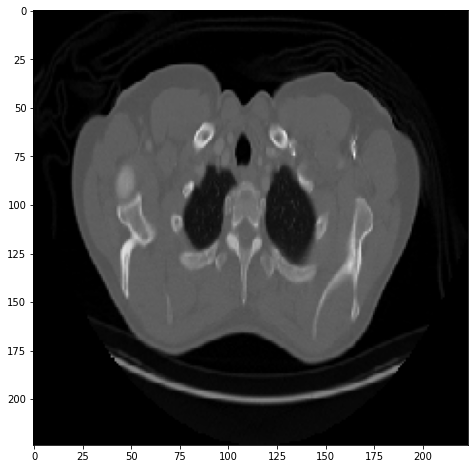

In [ ]:
from tensorflow.keras.preprocessing import image
im1 =image.load_img(fname,target_size=(224,224))
predict_image(im1)

In [ ]:
! ls /content/Data/test/large.cell.carcinoma

 000108.png	  '000124 (2).png'  '000138 (2).png'   000159.png
 000110.png	   000126.png	     000141.png        000160.png
'000111 (2).png'  '000127 (2).png'   000143.png        000162.png
 000111.png	  '000128 (2).png'  '000147 (2).png'   000163.png
'000113 (2).png'   000128.png	    '000148 (2).png'   000169.png
 000113.png	   000130.png	     000148.png        000170.png
 000114.png	  '000131 (2).png'   000149.png        000171.png
'000115 (2).png'   000131.png	     000150.png       '000172 (2).png'
 000116.png	  '000132 (2).png'  '000154 (2).png'   000172.png
 000118.png	  '000133 (2).png'   000154.png       '000173 (2).png'
 000120.png	   000133.png	     000155.png        000173.png
 000122.png	  '000136 (2).png'   000158.png        000174.png
 000123.png	   000137.png	    '000159 (2).png'


In [ ]:
! cp /content/Data/test/large.cell.carcinoma/'000159 (2).png' /content

In [ ]:
fname_1 = '/content/000159 (2).png'


----------------------------Chest Cancer type detection----------------------------

--------------------result----------------------

1/1 [==============================] - 0s 30ms/step
Adenocarcinoma


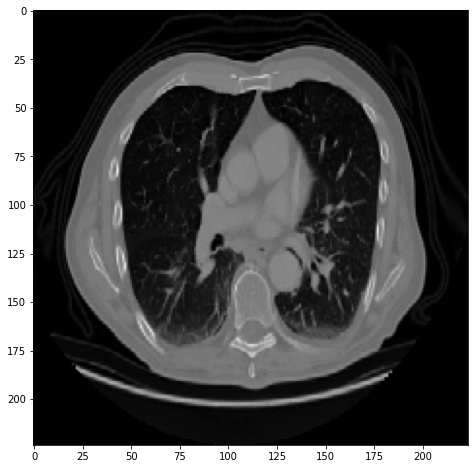

In [ ]:
im2 =image.load_img(fname_1,target_size=(224,224))
predict_image(im2)